In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.state import DotsGeneticAlgorithmState
from src.baseline import BaselineGeneticAlgorithm
from src.crossovers import mean_crossover
from src.mutations import square_mutation

In [2]:
POPULATION_SIZE = 1000
DIMENSION_SIZE = 3
CONSTRAINTS = (-4, 4)
RANDOM_STATE = 100

In [3]:
current_state = DotsGeneticAlgorithmState(
    population_size=POPULATION_SIZE,
    dimension_size=DIMENSION_SIZE,
    constraints=CONSTRAINTS,
    random_state=RANDOM_STATE,
)

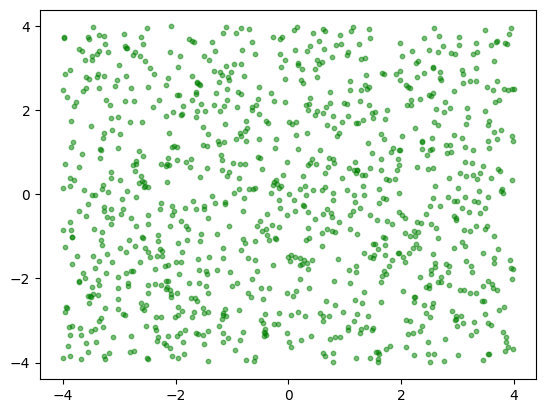

In [4]:
x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [5]:
from typing import Sequence


def function_1(pop: Sequence[float]):
    first = np.power(pop - 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

def function_2(pop: Sequence[float]):
    first = np.power(pop + 1 / np.sqrt(len(pop)), 2)
    value = 1 - np.exp(-np.sum(first))
    return value

function_1([3, 4])
function_2([3, 4])

0.9999999999999998

In [6]:
algo = BaselineGeneticAlgorithm(
    state=current_state,
    eval_functions=[function_1, function_2],
    mutation_function=square_mutation,
    mating_function=mean_crossover,
)

In [7]:
algo.get_best()

[[0.5958067361867077, 0.10293014475030127, 0.435814464575472],
 [0.005672946670356893, 0.007116033229406682, 0.871224830533925],
 [-0.29979018158483406, 0.020948513301724425, -0.10206765006247842],
 [-0.16605614502530397, -0.14266383610231603, 0.21236332834888128],
 [-0.3901042868708844, -0.8147553611786753, -0.3400983102484112],
 [-0.026884259737486538, -0.49029002486900275, -0.7226628657305572],
 [-0.1618313597527754, 0.14645339991460826, 0.4734762870351483],
 [-0.19729264010274505, 0.23322224615596454, -0.05846563650814751],
 [0.26497094871133786, 0.43887224460997576, 0.8987560948240416]]

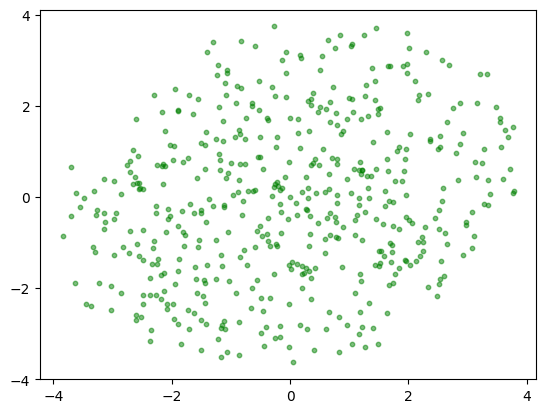

In [8]:
algo.select(keep_share=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

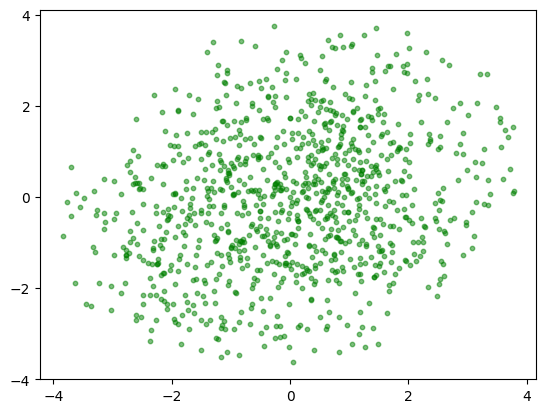

In [9]:
algo.mate()

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

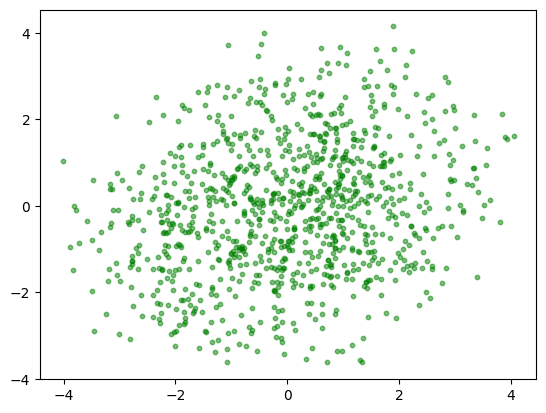

In [10]:
algo.mutate(delta=0.5)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [11]:
algo.get_best()

[[-0.6660869102226242, -0.6910046697577913, -0.5974597699702469],
 [-0.09120368679877866, 0.04924296220740498, 0.24235634654356386],
 [-0.2262523999649273, -0.15257132295509623, -0.3367814278672967],
 [0.13577767080253034, 0.014328439172078933, 0.31945994378796394],
 [0.4013227655405385, 0.3602784008031463, 0.4434425350070179],
 [-0.44996629646095787, -0.14552720383842255, -0.32193163301437755],
 [0.6264698221847391, 0.1042978136377366, 0.27295895843459217],
 [-0.013681593424691663, -0.3610551410605116, 0.0754051201608621],
 [-0.06872974587387404, 0.18279731949626798, 0.058424096079662924],
 [0.21749313966311723, 0.25763691499397234, 0.21488675740517893],
 [-0.7706261178953273, -0.17220587792115571, -0.554398973251387],
 [0.6081720733893468, 0.7481886918347578, 0.5291137451525594],
 [0.2577966630885835, 0.31031010645757773, 0.4964213409419256],
 [0.049877380519162795, 0.34508257829886935, -0.0697691656723558],
 [-0.2927226706364925, 0.05813074651343353, -0.01759530388318442],
 [0.03163

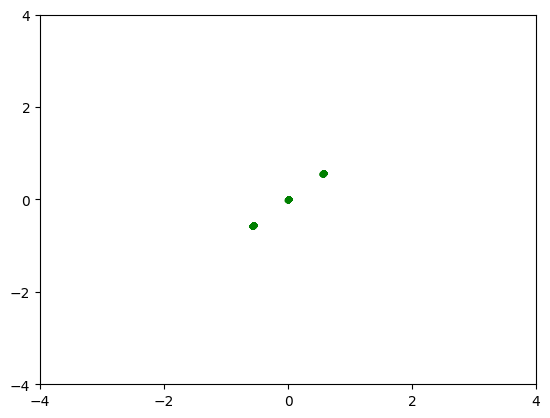

In [12]:
for i in range(1, 100):
    algo.select(keep_share=0.3)
    algo.mate()
    algo.mutate(delta=0.5 / i)

x = np.array(current_state.population)[:, 0]
y = np.array(current_state.population)[:, 1]

plt.scatter(x, y, s=10, c="green", alpha=0.5)
plt.xticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.yticks(np.arange(CONSTRAINTS[0], CONSTRAINTS[1] + 1, 2))
plt.show()

In [13]:
algo.get_best()

[[-0.5723901330269829, -0.5683596401267863, -0.5720490293955778],
 [-0.5576910262992353, -0.5586089694331676, -0.5566778113765737],
 [-0.55775414311659, -0.557854805636782, -0.5552279732119544],
 [0.5710076843402815, 0.5696145022477974, 0.5699458316696102],
 [0.5522197773462892, 0.5592527856857277, 0.5551401041545915],
 [-0.5616254669535172, -0.5616156673044297, -0.5590777548781015],
 [0.5756370650640931, 0.5770756664236322, 0.5748450514249696],
 [-0.5580883294424958, -0.5618107079831182, -0.5621451123665073],
 [0.5718312126238516, 0.5710148873662491, 0.5736063693199488],
 [-0.5615571144023012, -0.5639565867319419, -0.5594175588496669],
 [-0.5638422768673578, -0.5631124419908916, -0.5628402016933628],
 [-0.5612997922421304, -0.5587004074252828, -0.5656208604192389],
 [-0.5663751695061715, -0.5647061359767268, -0.5623989326543837],
 [-0.5527031190061761, -0.5588687658551537, -0.5574609957300153],
 [0.5685531148328722, 0.5645497780162914, 0.5690285589059421],
 [-0.5574566483862672, -0.55